In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
def format_data(data):
    if (type(data) == str) :
        if (data == ' ') :
            return np.nan
        else :
            return np.float64(data)
    else :
        return data

In [3]:
def s_to_ns(x):
    return x/1.0e-9

In [4]:
def convert_to_ns(df):
    df['time_ns']=df.index.map(s_to_ns)

In [5]:
def get_wf_pedestal(df,time_pedestal):
    return np.mean(df[df.index<time_pedestal][df.columns[0]])

In [6]:
def get_max_ampl(df):
    return np.max(df[df.columns[0]])

In [7]:
def analyze(df,time_pedestal):
    df.set_index(df.columns[0],inplace=True)
    df.dropna(inplace=True)
    convert_to_ns(df)
    df.set_index('time_ns',inplace=True)
    pedestal_v=get_wf_pedestal(df,time_pedestal)
    df[df.columns[0]]=-(df[df.columns[0]]-pedestal_v)
    ampl=get_max_ampl(df)
    return {'pedestal':pedestal_v, 'ampl':ampl}

In [8]:
#outname_pref='TERZINA_TERZINAampl_30um_N77098_'
#df = pd.read_csv('./reference_waveforms/30u_N7098_preampOut_param1-100.csv')
#i00=1
#df = pd.read_csv('./reference_waveforms/30u_N7098_preampOut_param100-3000.csv')
#i00=200
#df = pd.read_csv('./reference_waveforms/30u_N7098_preampOut_7097.csv')
#i00=7097

outname_pref='TERZINA_TERZINAampl_30um_N7303_'
#df = pd.read_csv('./reference_waveforms/30u_N7303_preampOut_param1-100.csv')
#i00=1
#df = pd.read_csv('./reference_waveforms/30u_N7303_preampOut_param100-3000.csv')
#i00=200
df = pd.read_csv('./reference_waveforms/30u_N7303_preampOut_7302.csv')
i00=7302

In [9]:
n_pe=int(len(df.columns)/2)
time_pedestal = 2500 #ns

In [10]:
for i in range(0,n_pe):
    t_val_old_name = df.columns[2*i]
    v_val_old_name = df.columns[2*i+1]
    t_val_new_name = str('t_Nf_'+str(i+1))
    v_val_new_name = str('v_Nf_'+str(i+1))
    #print(t_val_new_name," ",v_val_new_name)
    df.rename(columns={t_val_old_name: t_val_new_name,
                       v_val_old_name: v_val_new_name},inplace=True)

In [11]:
for x in df.columns :
     df[x]=df[x].map(format_data)

In [12]:
df.describe()

t_Nf_1       v_Nf_1
count  1107.000000  1107.000000
mean      0.000004     0.595761
std       0.000003     0.349620
min       0.000000     0.115561
25%       0.000003     0.164012
50%       0.000003     0.864700
75%       0.000004     0.901164
max       0.000020     0.918074

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t_Nf_1  1107 non-null   float64
 1   v_Nf_1  1107 non-null   float64
dtypes: float64(2)
memory usage: 17.4 KB


In [14]:
df_list=[df.copy(deep=True)[[str('t_Nf_'+str(i+1)),str('v_Nf_'+str(i+1))]] for i in range(n_pe)]

In [15]:
df_list[0].columns[0]

't_Nf_1'

In [16]:
ana=[analyze(df=l,time_pedestal=time_pedestal) for l in df_list];

<Axes: xlabel='time_ns'>

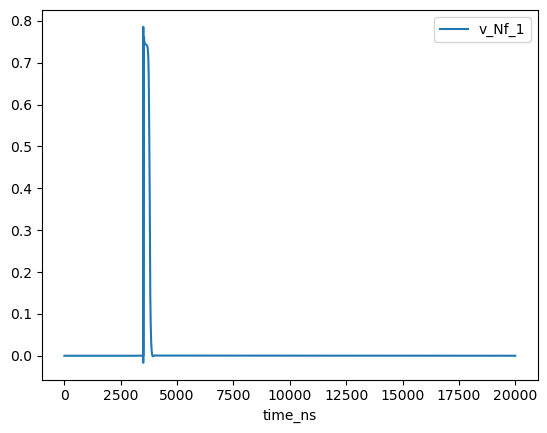

In [17]:
df_list[0].plot()

In [18]:
ana[0]['ampl']

0.7857658299161998

In [19]:
np.mean(df_list[0][df_list[0].index<2500]['v_Nf_1'])

-9.191190613700067e-17

<Axes: xlabel='time_ns'>

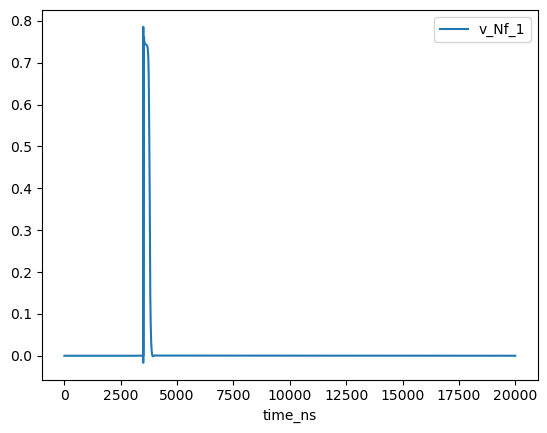

In [20]:
df_list[0].plot()

In [21]:
len(df_list)

1

In [22]:
for i in range(len(df_list)):
    #outname = str('TERZINA_TERZINAampl_30um_N7098_'+str(1+i)+'pe.csv')
    #outname = str('TERZINA_TERZINAampl_30um_N7303_'+str(1+i)+'pe.csv')
    #outname = str('TERZINA_TERZINAampl_30um_N7098_'+str(199+i)+'pe.csv')
    outname = str(outname_pref+str(i00+i)+'pe.csv')
    df_list[i].to_csv(outname,sep=' ',header=False)
    print(outname)

TERZINA_TERZINAampl_30um_N7303_7302pe.csv


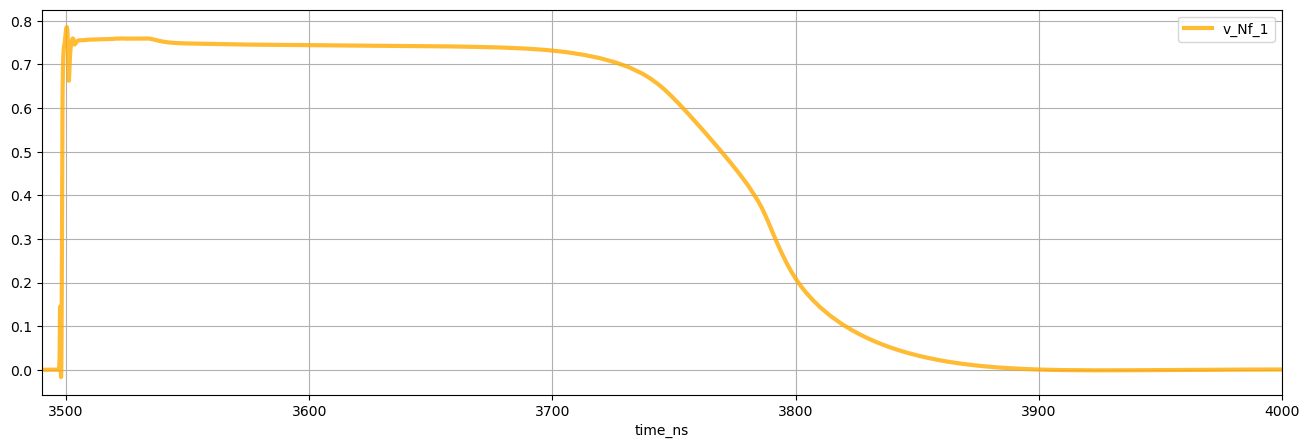

In [23]:
xlim=(3490,4000)
if len(df_list)> 1:
    ax=df_list[0].plot( alpha=0.8, figsize=(16,5), xlim=xlim,c='#FFAA00',linewidth=3);
    df_list[1].plot(ax=ax, alpha=0.8,c='#221100',linewidth=3);
    df_list[2].plot(ax=ax, alpha=0.8,c='#2211FF',linewidth=3);
    df_list[3].plot(ax=ax, alpha=0.8,c='#221188',linewidth=3);
    df_list[4].plot(ax=ax, alpha=0.8,c='#229900',linewidth=3);
    df_list[5].plot(ax=ax, alpha=0.8,c='#00FF00',linewidth=3);
    ax.set(xlabel='time, ns',ylabel='Amplitude, V');
    #ax.legend(['200 p.e.', '300 p.e.', '500 p.e.', '1000 p.e.', '2000 p.e.', '3000 p.e.'])
    #ax.legend(['1 p.e.', '2 p.e.', '3 p.e.', '4 p.e.', '5 p.e.', '6 p.e.'])
else:
    ax=df_list[0].plot( alpha=0.8, figsize=(16,5), xlim=xlim,c='#FFAA00',linewidth=3);
ax.yaxis.grid(True)
ax.xaxis.grid(True)

<Axes: xlabel='time_ns'>

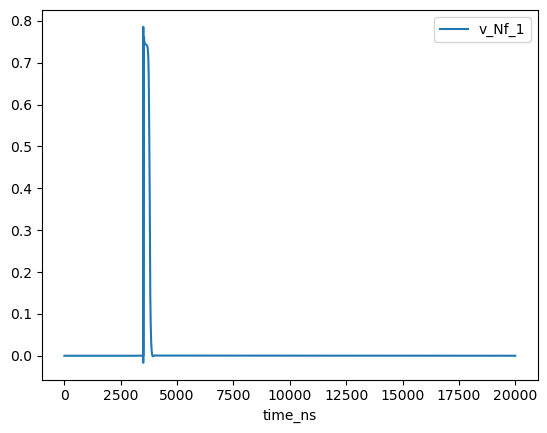

In [24]:
df_list[0].plot()

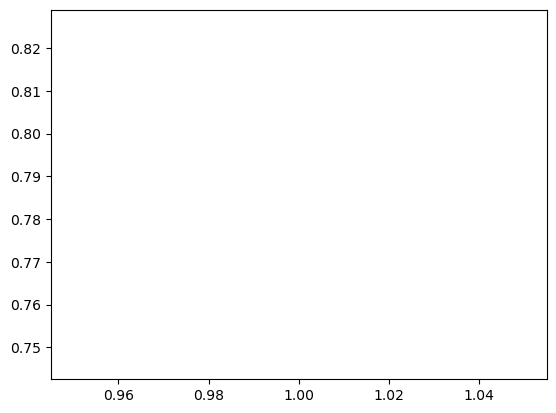

In [25]:
plt.plot([i+1 for i in range(n_pe)],[ana[i]['ampl']/(i+1) for i in range(n_pe)])
#ax.set(xlabel='time, ns',ylabel='Amplitude, V');
#ax.yaxis.grid(True)
#ax.xaxis.grid(True)

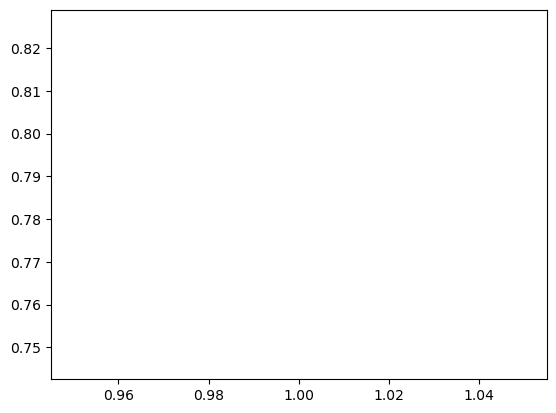

In [26]:
plt.plot([i+1 for i in range(n_pe)],[ana[i]['ampl'] for i in range(n_pe)])

In [27]:
df_all_cells = pd.read_csv('./reference_waveforms/30u_N7303_preampOut_7302.csv')

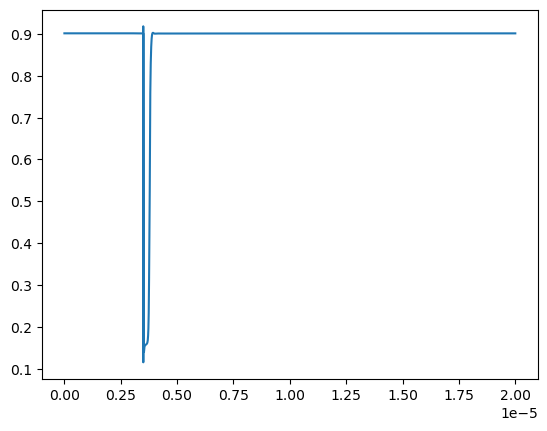

In [28]:
plt.plot(df_all_cells['time (s)'],df_all_cells['VT("/Vout") (V)'])